### *Import Libraries*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

### *Load Data*

In [11]:
url = "C:\\Users\\PC\\Desktop\\Criaglist\\data\\criaglist_clear.parquet"
df_clear = pd.read_parquet(url)
df_clear.drop_duplicates(inplace=True)

In [18]:
df_clear.transmission.unique()

array(['automatic', 'manual'], dtype=object)

In [19]:
df_clear.type.unique()

array(['sedan', 'van', 'mini-van', 'fastback', 'coupe', 'convertible',
       'crossover', 'SUV', 'pickup', 'wagon', 'hatchback', 'truck',
       'minivan', 'crew cab', 'offroad'], dtype=object)

In [21]:
df_clear.type = np.where(df_clear.type=="offroad","SUV",df_clear.type)

In [22]:
df_clear.model = [model.lower() for model in df_clear.model]

In [23]:
df_clear.model = np.where(df_clear.model=="mazda6gt","mazda6",df_clear.model)
df_clear.model = np.where(df_clear.model=="type r","civic",df_clear.model)

In [27]:
df_clear.query('type=="pickup" and manufacturer=="gmc"').model.unique()

array(['sonoma', '2500', '2500hd', 'canyon', 'sierra'], dtype=object)

In [32]:
df_clear.model = np.where((df_clear.model=="2500") | (df_clear.model=="2500hd"),'sierra',df_clear.model)

In [40]:
df_clear.query('type=="pickup" and manufacturer=="gmc"').model.unique()

array(['sonoma', 'sierra', 'canyon'], dtype=object)

In [41]:
df_clear.query('type=="pickup" and manufacturer=="dodge"').model.unique()

array(['dakota', '1500', 'sierra', '3500'], dtype=object)

In [42]:
dodge = df_clear.query('manufacturer=="dodge"')
df_clear = df_clear.query('manufacturer!="dodge"')

In [43]:
dodge = dodge.query('model!="sierra"')

In [44]:
df_clear = pd.concat([dodge,df_clear])

In [45]:
df_clear.model.unique()

array(['neon', 'stratus', 'charger', 'avenger', 'intrepid', 'dart',
       'viper', 'challanger', 'durango', 'journey', 'nitro', 'dakota',
       '1500', '3500', 'caliber', 'magnum', 'grand caravan', 'sprinter',
       'crown', 'fiesta', 'focus', 'fusion', 'taurus', 'econoline',
       'transit', 'mustang', 'shelby', 'ecosport', 'edge', 'explorer',
       'excursion', 'escape', 'ranger', 'f-150', 'f-250', 'f-350',
       'impala', 'cavalier', 'malibu', 'cobalt', 'cruze', 'prizm',
       'lumina', 'caprice', 'ss', 'tahoe', 'suburban', 'tracker',
       'captiva', 'trax', 'traverse', 'blazer', 'equinox', 'trailblazer',
       's10', 'silverado', 'colorado', 'avalanche', 'ssr', 'corvette',
       'camaro', 'monte carlo', 'hhr', 'sonic', 'spark', 'volt', 'bolt',
       'c5500', 'c7500', 'c4500', 'yukon', 'envoy', 'acadia', 'sonoma',
       'sierra', 'canyon', 'safari', 'deville', 'sts', 'cts', 'catera',
       'xts', 'ats', 'ct6', 'ct5', 'ct4', 'eldorado', 'elr', 'escalade',
       'srx', 

### *Data Transformation*

In [46]:
plt.style.use('ggplot')

In [47]:
def hist(df):
    
    fig,ax = plt.subplots(1,1,figsize = (15,5))
    ax.set_title('Odometer')
    ax.hist(df.odometer,color = "#ff0000",ec = "orange",lw = 3)
    plt.show()

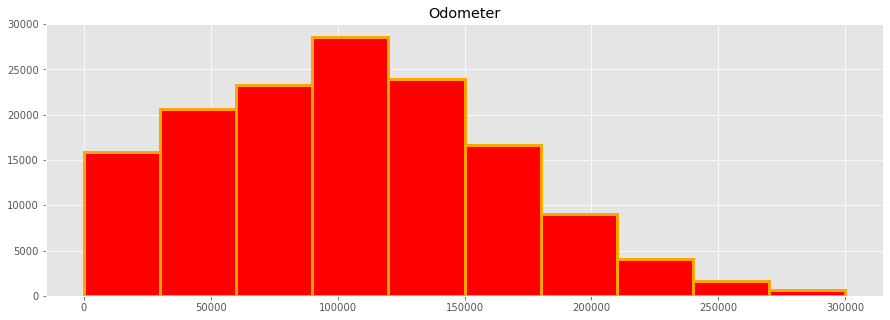

In [48]:
hist(df_clear)

The Odometer variable has vehicles with a mileage that is much higher than the average, we will proceed to make a transformation applying the square root, causing the data to be closer to the average.

In [49]:
df_clear.odometer = df_clear.odometer.apply(np.sqrt)

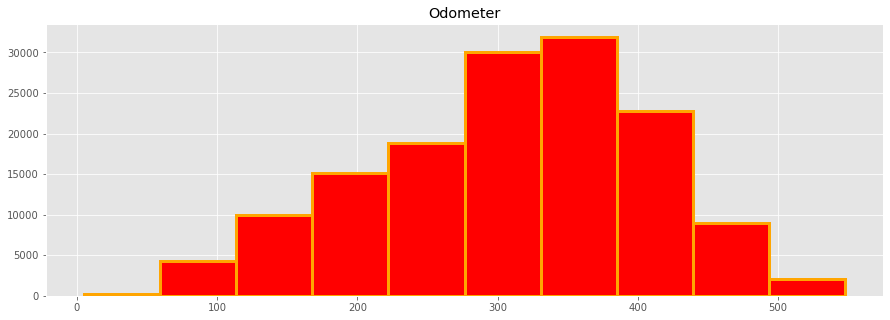

In [50]:
hist(df_clear)

We observe that the extreme values are closer to the average value, something that can help our distribution model.

## *Categorical Variables*

Algorithms work extremely well with numbers, so we must transform categorical variables to numeric.

In [51]:
df_clear.manufacturer.unique()

array(['dodge', 'ford', 'chevrolet', 'gmc', 'cadillac', 'chrysler',
       'jeep', 'kia', 'hyundai', 'audi', 'bmw', 'mercedes-benz',
       'volkswagen', 'nissan', 'toyota', 'honda', 'mitsubishi', 'mazda',
       'subaru', 'infiniti', 'acura', 'lexus'], dtype=object)

In [52]:
premium  = ['gmc','cadillac','audi','bmw','mercedes-benz','infiniti','acura','lexus']
def isPremium(x):
    if x in premium:
        return 1
    else:
        return 0
df_clear['premium'] = df_clear.manufacturer.apply(isPremium)

### *Nominal*

In [53]:
df_clear.title_status = np.where(df_clear.title_status=="parts only","salvage",df_clear.title_status)

In [54]:
df_clear.title_status.unique()

array(['clean', 'salvage', 'lien', 'rebuilt', 'missing'], dtype=object)

The price can be affected by the title of the vehicle, for example if the car does not have a title it can be drastically reduced by buying it with a vehicle that has its title in order.

In [55]:
lables = ['missing','lien','salvage','rebuilt','clean']
nominal = np.arange(0,5,step = 1)
df_clear.title_status = df_clear.title_status.replace(lables,nominal)
df_clear.title_status = df_clear.title_status.astype(np.int32)
df_clear.transmission = np.where(df_clear.transmission=="automatic",1,0)

### *Ordinal*

In [25]:
df_clear = pd.get_dummies(df_clear,prefix="",prefix_sep="")

We will apply a transformation of dummy variables, for those variables of nominal type, it will create a new column according to the number of categories where a numerical value of 1 will be assigned to the observation that meets a certain characteristic while the other columns will be filled with zeros.

## *Save Dataset Clear*

In [26]:
df_clear.to_parquet("C:\\Users\\PC\\Desktop\\Criaglist\\data\\criaglist_clearv2.parquet")